In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

office_df = pd.read_csv('office.csv')
office_df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [4]:
colors = ["red", "orange", "lightgreen", "darkgreen"]

ratings = office_df['Ratings']
q1 = ratings.quantile(0.25)
q2 = ratings.quantile(0.5)
q3 = ratings.quantile(0.75)
q4 = ratings.max()
quantile_list = [q1, q2, q3, q4]
quantile_list

[7.8, 8.2, 8.6, 9.8]

In [5]:
indexed_color_dict = {}
for i in range (len(quantile_list)): 
    indexed_color_dict[quantile_list[i]] = colors[i]
indexed_color_dict

{7.8: 'red', 8.2: 'orange', 8.6: 'lightgreen', 9.8: 'darkgreen'}

In [6]:
# the below function calculates and returns color on the basis of IMDB rating of the episode
def colorize(rating, indexed_color_dict):
    for key in indexed_color_dict:
        if float(key) >= rating:
            return indexed_color_dict[key]

In [7]:
office_df['Coloring'] = office_df['Ratings'].apply(colorize, args = (indexed_color_dict, ))

In [8]:
office_df['Episodes'] = np.arange(1, 189)    
office_df.head()


,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Coloring,Episodes
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,red,1
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,lightgreen,2
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,red,3
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,orange,4
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,lightgreen,5


In [9]:
no_starguest_df = office_df[office_df['GuestStars'].isnull()] #NaN
no_starguest_df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Coloring,Episodes
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,red,1
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,lightgreen,2
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,red,3
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,orange,4
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,lightgreen,5


In [10]:
starguest_df = office_df[office_df['GuestStars'].notna()] # not NaN, the value exists
starguest_df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Coloring,Episodes
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,red,6
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur,lightgreen,9
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak,lightgreen,10
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein,lightgreen,13
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta,lightgreen,15


In [12]:
max_index = office_df['Viewership'].idxmax()
    
most_popular = office_df.loc[max_index]
most_popular

Unnamed: 0                                                     77
Season                                                          5
EpisodeTitle                                        Stress Relief
About           Dwight's too-realistic fire alarm gives Stanle...
Ratings                                                       9.7
Votes                                                        8170
Viewership                                                  22.91
Duration                                                       60
Date                                              1 February 2009
GuestStars              Cloris Leachman, Jack Black, Jessica Alba
Director                                            Jeffrey Blitz
Writers                                          Paul Lieberstein
Coloring                                                darkgreen
Episodes                                                       78
Name: 77, dtype: object

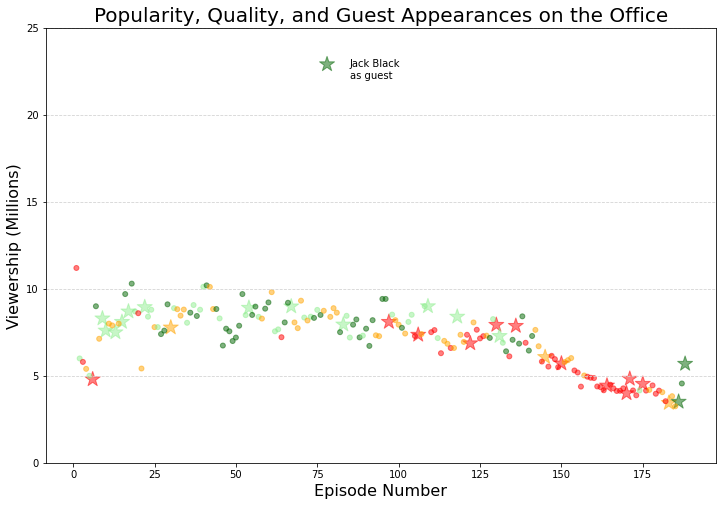

In [13]:
fig = plt.figure(figsize=(12,8))
    
# plotting guest starring episodes' data
plt.scatter(
    starguest_df['Episodes'],
    starguest_df['Viewership'], 
    c=starguest_df['Coloring'],  
    s=250, 
    marker = "*",
    alpha = 0.5)

# plotting episodes without guest stars' data
plt.scatter(
    no_starguest_df['Episodes'],
    no_starguest_df['Viewership'], 
    c=no_starguest_df['Coloring'],  
    s=25, 
    marker = "o",
    alpha = 0.5)

plt.xlabel("Episode Number", fontsize=16)
plt.ylabel("Viewership (Millions)", fontsize=16)
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize = 20)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.yticks([0,5,10,15,20,25])
plt.text(85, 22.1, s="Jack Black \nas guest")
plt.show()